In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from time import time

# herramientas de SVM
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from sklearn.metrics import confusion_matrix
from sklearn.impute import SimpleImputer

In [2]:
# leer el set de datos y consultar informacion basica
df = pd.read_csv('digitos.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


In [3]:
# consultar los primeros registros
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
df['label'].value_counts()

1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

<Axes: >

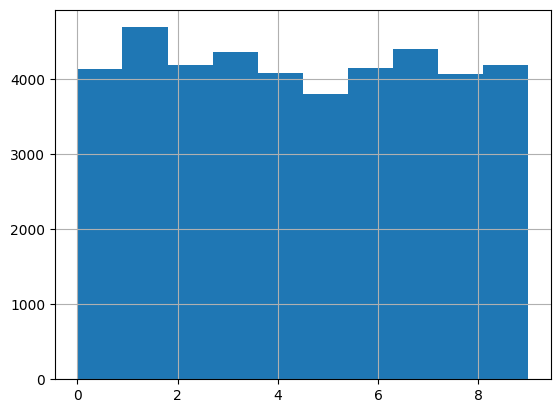

In [5]:
df['label'].hist()

In [6]:
# obtener una seccion del df usando los numeros de columna

pixeles = df.iloc[:,1:785] # X
digitos = df.iloc[:, 0:1] # y

In [7]:
# separar datos para entrenar y para probar
X_train, X_test, y_train, y_test = train_test_split(
    pixeles,
    digitos,
    test_size=0.5
)

In [8]:
X_train.shape

(21000, 784)

In [9]:
X_train.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
15088,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14045,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6117,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1982,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
20700,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
def mostrar_num(int_data):
  matriz = np.array(int_data.values)
  plt.imshow(matriz.reshape(28,28))

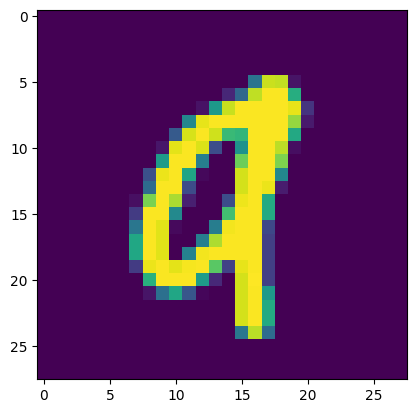

In [11]:
mostrar_num(X_test.iloc[100])

In [12]:
# creacion de modelo
modelo = SVC(kernel='linear') # Lineas rectas
# modelo = SVC(kernel='poly') # Lineas curvas
# modelo = SVC(kernel='rbf') # Lineas circulos

In [13]:
# entrenamiento
hora_inicio = time()
modelo.fit(X_train.values, y_train.values.ravel())
print('Entrenamiento terminado en {}'.format(time() - hora_inicio))

Entrenamiento terminado en 55.448904275894165


In [14]:
# crear prediccion de datos
hora_inicio = time()
y_pred = modelo.predict(X_test.values)
print('Prediccion terminada en {}'.format(time() - hora_inicio))
print(y_pred.shape)

Prediccion terminada en 63.58634638786316
(21000,)


In [15]:
# calcular la precision del algoritmo
precision = accuracy_score(y_test, y_pred)
print(f'Precision: {precision}')

Precision: 0.9104285714285715


El digito es: [9]


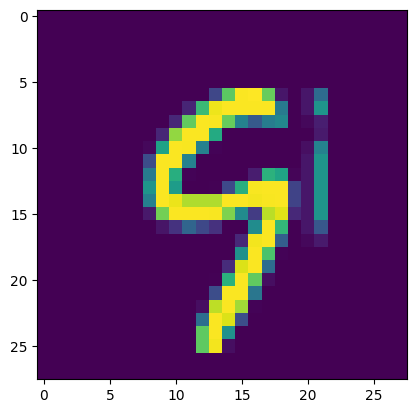

In [34]:
# hacer pruebas
muestra = X_test.iloc[10]
prueba = muestra
mostrar_num(prueba)
prediccion = modelo.predict([prueba])
print(f'El digito es: {prediccion}')

In [35]:
# prueba con la matriz de confusion
conf = confusion_matrix(y_test, y_pred)

In [36]:
conf

array([[2049,    0,    7,    5,    4,   17,    7,    1,    5,    0],
       [   0, 2288,    8,    5,    5,    1,    0,    6,   28,    0],
       [  28,   27, 1870,   32,   23,    9,   17,   14,   35,    3],
       [   9,   13,   80, 1904,    1,   90,    4,   18,   41,   16],
       [   6,   13,   19,    2, 1931,    4,   15,   15,    2,   51],
       [  29,   16,   21,  108,   13, 1599,   30,    5,   42,   15],
       [  26,    4,   23,    1,   20,   23, 1956,    1,    6,    0],
       [   7,   12,   28,   15,   29,    6,    0, 2038,    6,  105],
       [  15,   50,   39,   97,   12,   54,   15,   11, 1661,   14],
       [  13,   12,   12,   26,  117,   10,    0,   92,   15, 1823]])

In [51]:
def plot_cm(cm, classes):
  plt.imshow(cm, cmap=plt.cm.Blues)
  plt.title('Matriz de confusion')
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)
  thresh = cm.max() / 2.
  for indice_fila, fila in enumerate(cm):
    for indice_columna, columna in enumerate(fila):
      if cm[indice_fila, indice_columna] > thresh:
        color = 'white'
      else:
        color = 'black'

      plt.text(
          indice_columna,
          indice_fila,
          cm[indice_fila, indice_columna],
          color=color,
          horizontalalignment='center'
      )

  plt.ylabel('Valores reales')
  plt.xlabel('Valores calculados')
  plt.show()

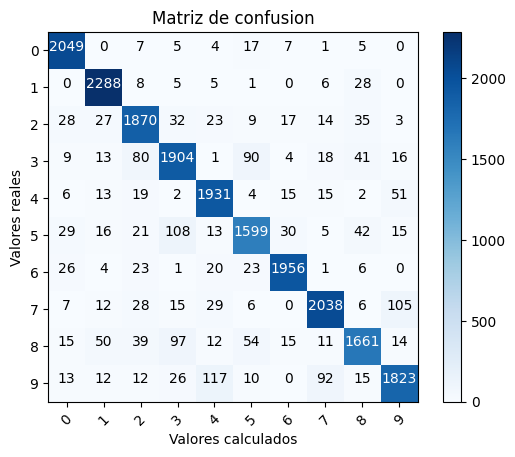

In [52]:
plot_cm(conf, [0,1,2,3,4,5,6,7,8,9])